<a href="https://colab.research.google.com/github/peteray-dev/ML_LinReg_Adv_Sales/blob/master/Linear_Regression_Class_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
slp = pd.read_csv('https://raw.githubusercontent.com/datacamp/Hacker-Stats-in-Python-Live-Training/master/data/gfmt_sleep.csv')

In [ ]:
slp.head()

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
0,8,f,39,65,80,72.5,91.0,90,93.0,83.5,93.0,90,9,13,2
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50,75.0,50,4,11,7
2,18,f,31,90,95,92.5,89.5,90,86.0,81,89.0,88,10,9,3
3,22,f,35,100,75,87.5,89.5,*,71.0,80,88.0,80,13,8,20
4,27,f,74,60,65,62.5,68.5,49,61.0,49,65.0,49,13,9,12


In [ ]:
slp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant number                102 non-null    int64  
 1   gender                            102 non-null    object 
 2   age                               102 non-null    int64  
 3   correct hit percentage            102 non-null    int64  
 4   correct reject percentage         102 non-null    int64  
 5   percent correct                   102 non-null    float64
 6   confidence when correct hit       102 non-null    float64
 7   confidence when incorrect hit     102 non-null    object 
 8   confidence when correct reject    102 non-null    float64
 9   confidence when incorrect reject  102 non-null    object 
 10  confidence when correct           102 non-null    float64
 11  confidence when incorrect         102 non-null    object 
 12  sci     

In [ ]:
slp_df = slp.drop(columns=['confidence when incorrect hit', 'gender', 'confidence when incorrect reject', 'confidence when incorrect'])
slp_df.head()

,participant number,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when correct reject,confidence when correct,sci,psqi,ess
0,8,39,65,80,72.5,91.0,93.0,93.0,9,13,2
1,16,42,90,90,90.0,75.5,70.5,75.0,4,11,7
2,18,31,90,95,92.5,89.5,86.0,89.0,10,9,3
3,22,35,100,75,87.5,89.5,71.0,88.0,13,8,20
4,27,74,60,65,62.5,68.5,61.0,65.0,13,9,12


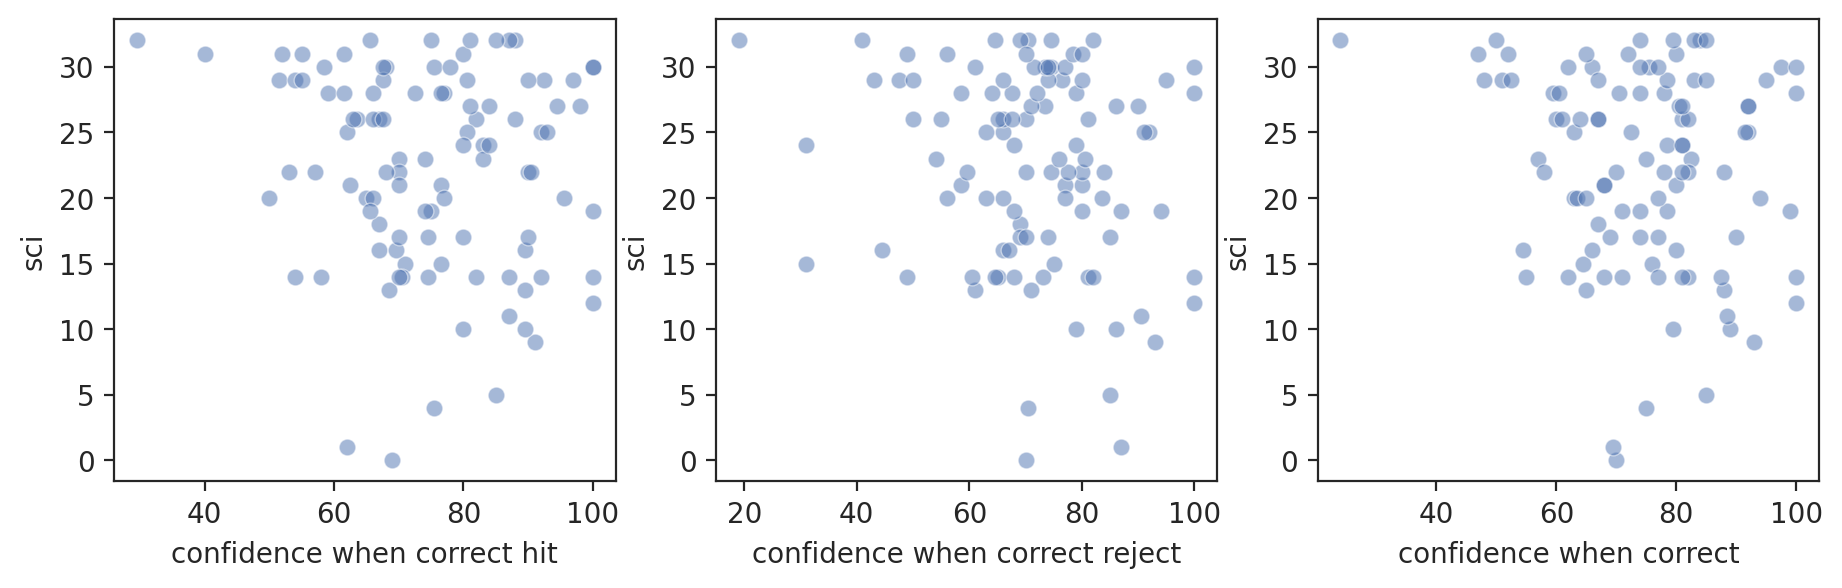

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11,3))
sns.scatterplot(data=slp_df, x='confidence when correct hit', y='sci', alpha=0.5, ax=axs[0])
sns.scatterplot(data=slp_df, x='confidence when correct reject', y='sci', alpha=0.5, ax=axs[1])
sns.scatterplot(data=slp_df, x='confidence when correct', y='sci', alpha=0.5, ax=axs[2]);

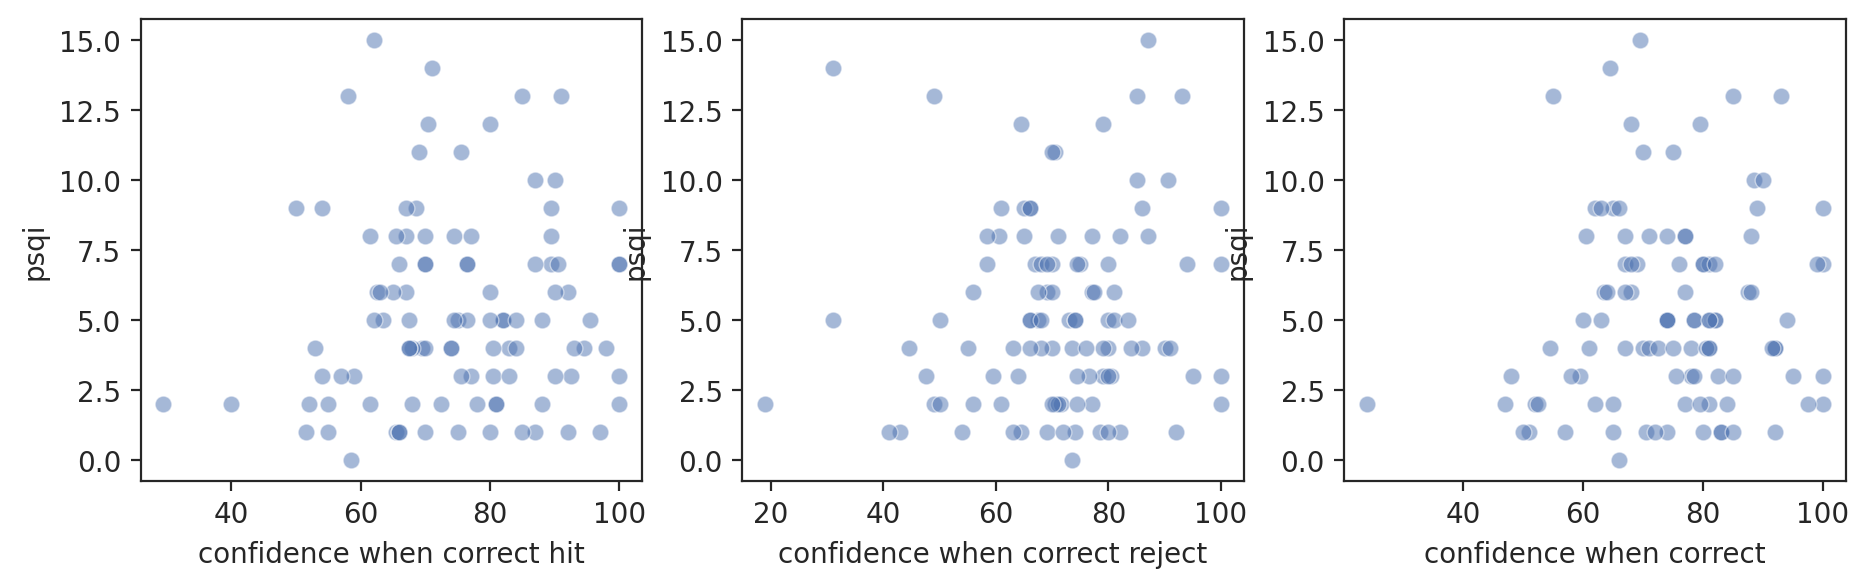

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11,3))
sns.scatterplot(data=slp_df, x='confidence when correct hit', y='psqi', alpha=0.5, ax=axs[0])
sns.scatterplot(data=slp_df, x='confidence when correct reject', y='psqi', alpha=0.5, ax=axs[1])
sns.scatterplot(data=slp_df, x='confidence when correct', y='psqi', alpha=0.5, ax=axs[2]);

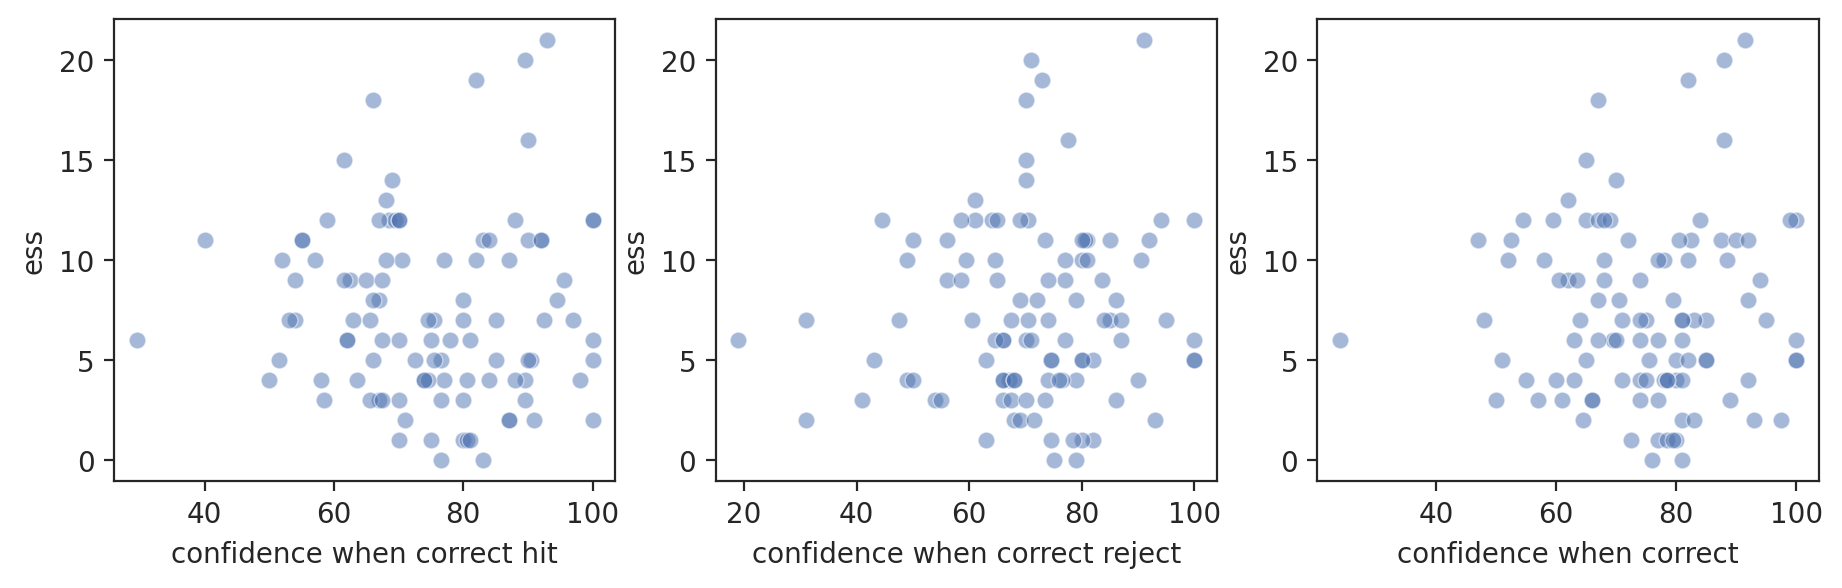

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11,3))
sns.scatterplot(data=slp_df, x='confidence when correct hit', y='ess', alpha=0.5, ax=axs[0])
sns.scatterplot(data=slp_df, x='confidence when correct reject', y='ess', alpha=0.5, ax=axs[1])
sns.scatterplot(data=slp_df, x='confidence when correct', y='ess', alpha=0.5, ax=axs[2]);

In [ ]:
# For Linear Regression model predictive on the plt.sci

X=slp_df.drop(columns='sci')
y=slp_df['sci']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7362764106839254, 0.6333658847636887)

In [ ]:
mean_absolute_error(y_train, lr.predict(X_train))

3.2013028486918245

In [ ]:
mean_absolute_error(y_test, lr.predict(X_test))

3.363021663267198